In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [4]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
df = pd.concat([train_df.drop(columns=['Survived']),test_df]).sample(1309)

In [8]:
# this is our total population
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
200,1092,3,"Murphy, Miss. Nora",female,NaN,0,0,36568,15.5000,NaN,Q
308,309,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
59,951,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C
734,735,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,NaN,S
329,330,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
...,...,...,...,...,...,...,...,...,...,...,...
377,1269,2,"Cotterill, Mr. Henry Harry""""",male,21.0,0,0,29107,11.5000,NaN,S
71,72,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
223,224,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
859,860,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C


In [9]:
# let's consider we have average fare of population
df['Fare'].mean()

33.29547928134557

<AxesSubplot: ylabel='Density'>

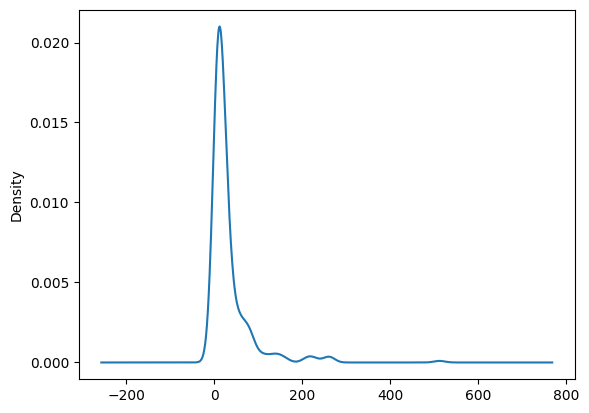

In [12]:
# But in real world scenario we dont have population data and mean 
# then how to predict mean of population 
# lets follow the procedure

df['Fare'].plot(kind='kde')

In [15]:
# sample size = 30 -> 10 times

samples = []
stds = []
for i in range(10):
    x = df['Fare'].dropna().sample(30).values
    stds.append(x.std())
    samples.append(x.tolist())

In [16]:
# convert into numpy array 

samples = np.array(samples)

In [17]:
samples.shape

(10, 30)

In [18]:
samples

array([[  9.5875,   6.4958,  50.    ,  14.4542,  30.5   ,  23.45  ,
          8.6625,   9.    ,   7.6292,  89.1042,  52.    , 108.9   ,
         42.4   , 153.4625,  31.3875,   7.8792,  15.2458,  30.    ,
         10.5   ,   7.8958, 512.3292,   8.1125,   7.8958,  11.5   ,
         29.7   ,   7.75  , 227.525 ,   7.225 ,  66.6   , 113.275 ],
       [ 56.4958,  56.4958,  26.    ,   7.8958,  27.7208, 113.275 ,
         31.3875,   7.75  ,  79.65  ,  29.    ,  13.4167,  10.5   ,
         15.2458,  21.6792,   8.6625,   8.05  ,  13.5   ,  27.75  ,
          7.125 ,  42.4   ,  26.    ,   7.8542,  26.    ,  13.    ,
         12.35  ,  83.475 ,   7.8208,  82.1708,  13.    ,  31.6792],
       [ 52.    ,  13.    ,   8.4583,   7.925 ,  14.5   ,  15.2458,
          8.6625,  13.    ,  46.9   ,   8.05  ,  13.    ,  52.5542,
        164.8667,  13.5   ,  31.275 ,   7.75  ,  31.5   ,   7.8542,
         14.5   ,   7.7958, 227.525 ,  36.75  ,  77.9583,   9.35  ,
         26.    ,   7.2292,   7.2292,  52.5542

In [19]:
# ham x bar nikal rahe hain
# axis = 1 kiya reason is hame every row ka mean nikal na hain  
samples = samples.mean(axis=0)

In [20]:
# samples -> ye hamara sampling dustribution hain 
sampling_mean = samples

In [25]:
# create sampling std for the formula (unknown sigma)
sample_std = np.mean(stds)

In [26]:
import seaborn as sns 

<AxesSubplot: ylabel='Density'>

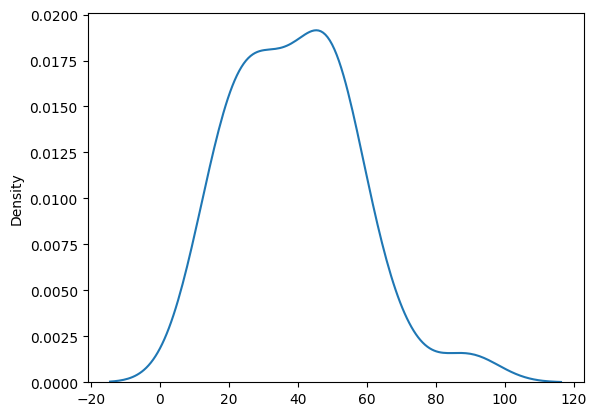

In [27]:
sns.kdeplot(sampling_mean)

In [35]:
# 95% confidence level prr value find out kiya hain
lower_limit = sampling_mean.mean() - 2.042* (sample_std/np.sqrt(30))
upper_limit = sampling_mean.mean() + 2.042* (sample_std/np.sqrt(30))

In [33]:
print('The Range is :',lower_limit,':',upper_limit)

The Range is : 18.97211315533248 : 59.37608217800086


In [34]:
df['Fare'].mean()

33.29547928134557

In [37]:
# 50% confidence level prr value find out kiya hain -> t table se 
lower_limit = sampling_mean.mean() - 0.683* (sample_std/np.sqrt(30))
upper_limit = sampling_mean.mean() + 0.683* (sample_std/np.sqrt(30))

In [38]:
print('The Range is :',lower_limit,':',upper_limit)

The Range is : 32.417018616107775 : 45.93117671722556
